In [26]:
!pip install seaborn



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
!pip install nltk



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91986\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91986\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91986\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [30]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
#importing training data
data = pd.read_csv('train_data.txt', delimiter=':::' ,header = None ,engine='python')


In [32]:
# naming different columns
data.columns = ['id','title','genre','desc']
data.head()

id                               title       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                                desc  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [33]:
#dropping(removing) duplicates
data.drop_duplicates(inplace = True)
#dropping null values 
data.dropna(inplace = True)

In [34]:
data.shape

(54214, 4)

In [35]:
#setting stopwords
stopwords = set(stopwords.words('english'))

In [36]:
def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    
    text = [word for word in text if word not in stopwords]
    
    
    return " ".join(text) 

In [37]:
# we need to preprocess the description
data["desc_clean"] =  data["desc"].apply(preprocessing)

In [38]:
data['desc_clean']

0        listening conversation doctor parents 10yearol...
1        brother sister past incestuous relationship cu...
2        bus empties students field trip museum natural...
3        help unemployed father make ends meet edith tw...
4        films title refers unrecovered bodies ground z...
                               ...                        
54209    shortlived nbc live sitcom centered bonino wor...
54210    next generation exploitation sisters kapa bay ...
54211    ze bestaan echt standup comedy growing facing ...
54212    walter vivian live country difficult time keep...
54213    labor day weekend 1935 intense hurricane ever ...
Name: desc_clean, Length: 54214, dtype: object

In [39]:
data["genre"].value_counts()

genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

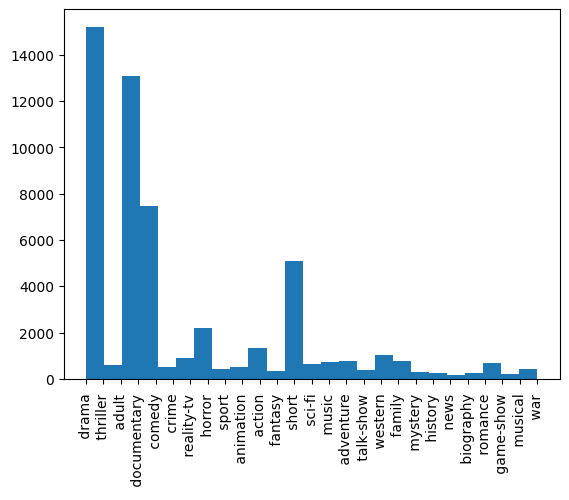

In [40]:
plt.hist(data['genre'],bins=25)
plt.xticks(rotation=90)
plt.show()

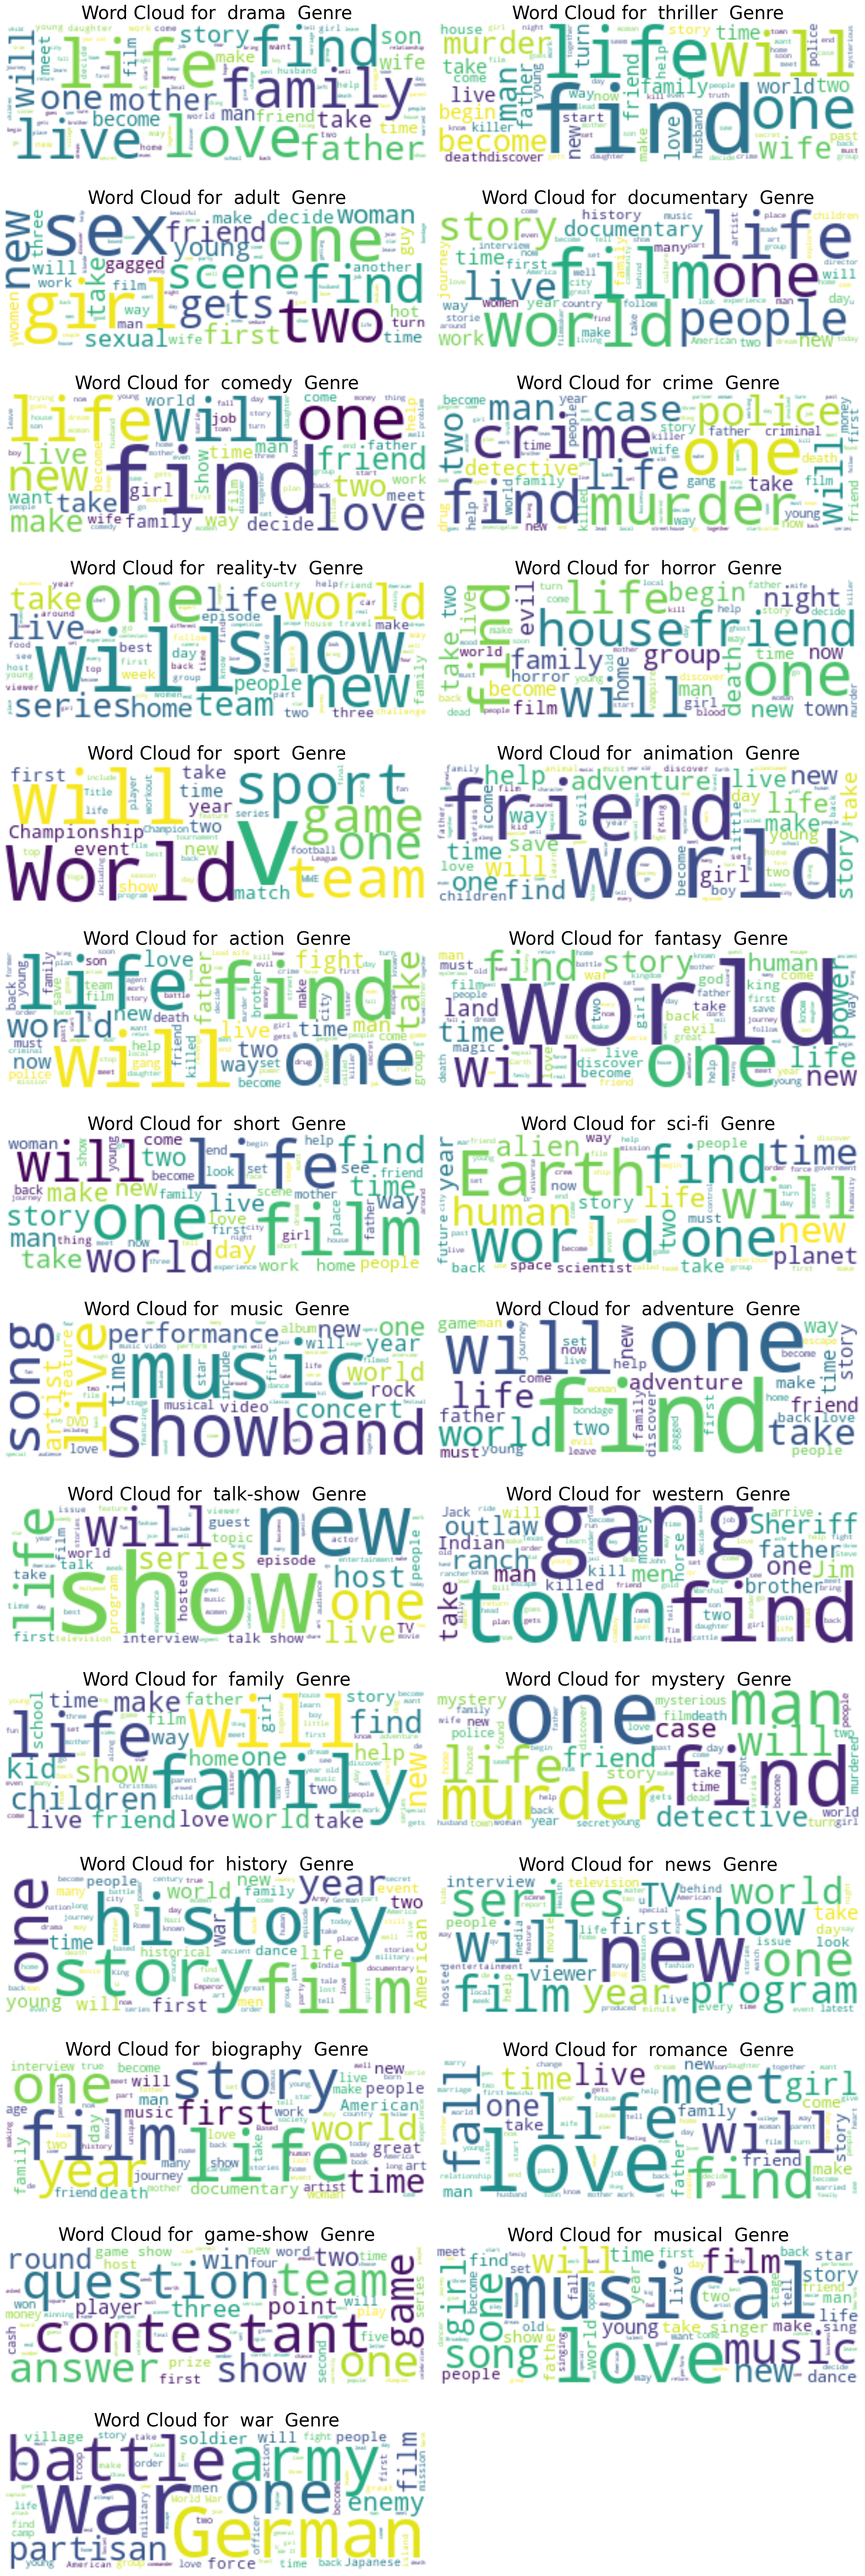

In [41]:
genres = data['genre'].unique()
plt.figure(figsize=(20, 60))

# Iterate over each genre
for i, genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)  # Assuming you have 14 rows and 2 columns for 28 genres
    text_subset = " ".join(list(data[data["genre"] == genre]['desc']))
    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre',fontsize=30)
    plt.axis('off')

    #bbb
plt.tight_layout()
plt.show()

In [42]:
# removing lesser relevant feautures
data.drop(['id','title'], axis=1)
data.head()

id                               title       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                                desc  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                          desc_clean  
0  listening conversation doctor parents 10yearol...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip museum natural...  
3  help unemployed father make ends meet edith tw...  
4  films title refers unrecovered bodies ground z...

In [43]:
## import necessary library 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [44]:
# converting genres to numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['genre_encd'] = label_encoder.fit_transform(data['genre'])
class_names= list(label_encoder.classes_)
class_names  

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [45]:
data.head()

id                               title       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                                desc  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                          desc_clean  genre_encd  
0  listening conversation doctor parents 10yearol...           8  
1  brother sister past incestuous relationship cu...          24  
2  bus empties students field trip museum natural...           1  
3  help unemployed father make ends meet edith tw...           8  
4  films title refers unrecovered bodies ground z...           8

In [46]:
## Split the data
x = data["desc_clean"]
y = data["genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [47]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

In [48]:
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 =  vectorize.transform(x_test)

Model Score on Training data 0.9995204190799425
Model Score on Test data 0.5530674733463681
               precision    recall  f1-score   support

      action        0.31      0.42      0.36       487
       adult        0.36      0.58      0.45       184
   adventure        0.16      0.36      0.22       170
   animation        0.10      0.39      0.16        70
   biography        0.00      0.00      0.00         7
      comedy        0.56      0.50      0.53      4156
       crime        0.10      0.25      0.14        91
 documentary        0.78      0.69      0.73      7448
       drama        0.68      0.54      0.60      8536
      family        0.13      0.28      0.18       177
     fantasy        0.05      0.25      0.09        36
   game-show        0.56      0.87      0.68        68
     history        0.01      0.20      0.01         5
      horror        0.55      0.64      0.59       940
       music        0.48      0.61      0.54       288
     musical        0.05   

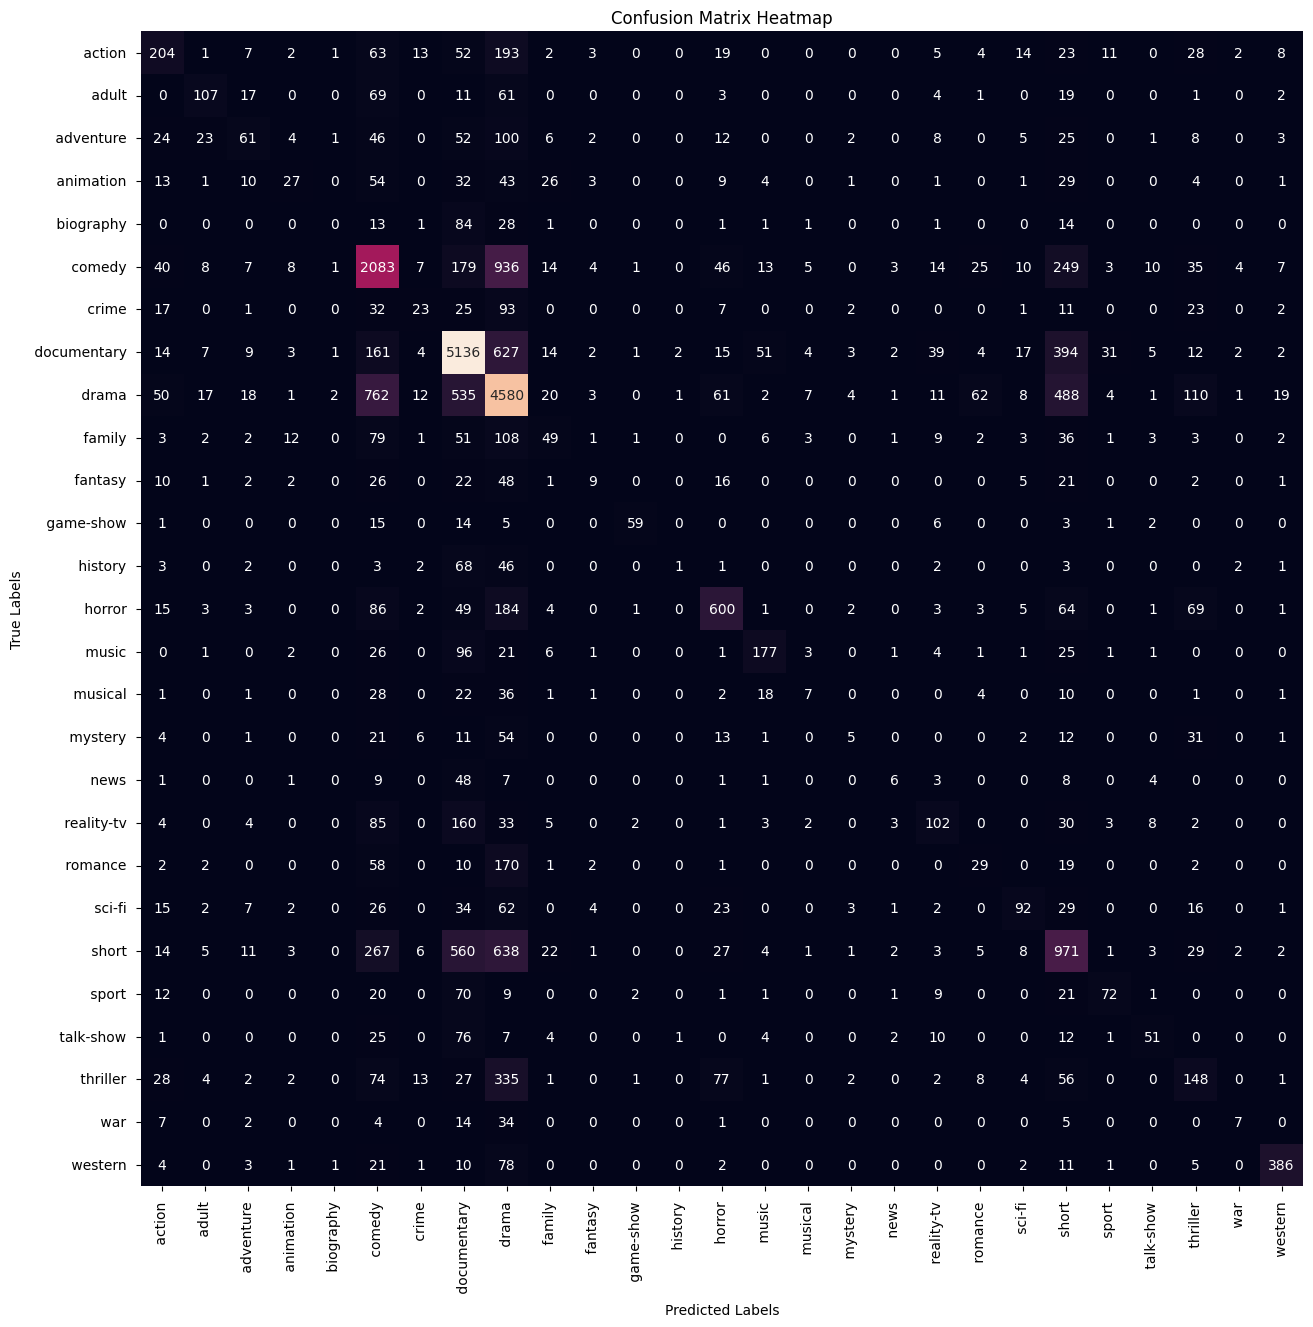

In [50]:
# classification using logistic regression
model = LogisticRegression()
model.fit(x_train2 ,y_train)
print("Model Score on Training data",model.score(x_train2 ,y_train))
print("Model Score on Test data",model.score(x_test2 ,y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()